In [58]:
import xarray as xr
import glob
import netCDF4 as nc
import numpy as np
import socket
import json
import os
import sys
from datetime import datetime, timezone, timedelta
import xmitgcm as xm

import matplotlib.pyplot as plt

# Get the path to the parent folder (one level up)
parent_folder = os.path.abspath(os.path.join(os.getcwd(), '../..'))
print(parent_folder)

# Add the parent folder to sys.path
sys.path.append(parent_folder)
from mitgcm.utils_mitgcm import open_mitgcm_ds_from_config
#%matplotlib notebook
# seaborn for interactive plots or bokee or hvplot

/home/rasmusso@eawag.wroot.emp-eaw.ch/Documents/plot_results


In [59]:
model = 'test_zurich'
lake_name='Zurich'
mitgcm_config, ds_to_plot = open_mitgcm_ds_from_config('..//config.json', model)

In [60]:
ds_to_plot = ds_to_plot.isel(YG=range(0,54), YC=range(0,54))

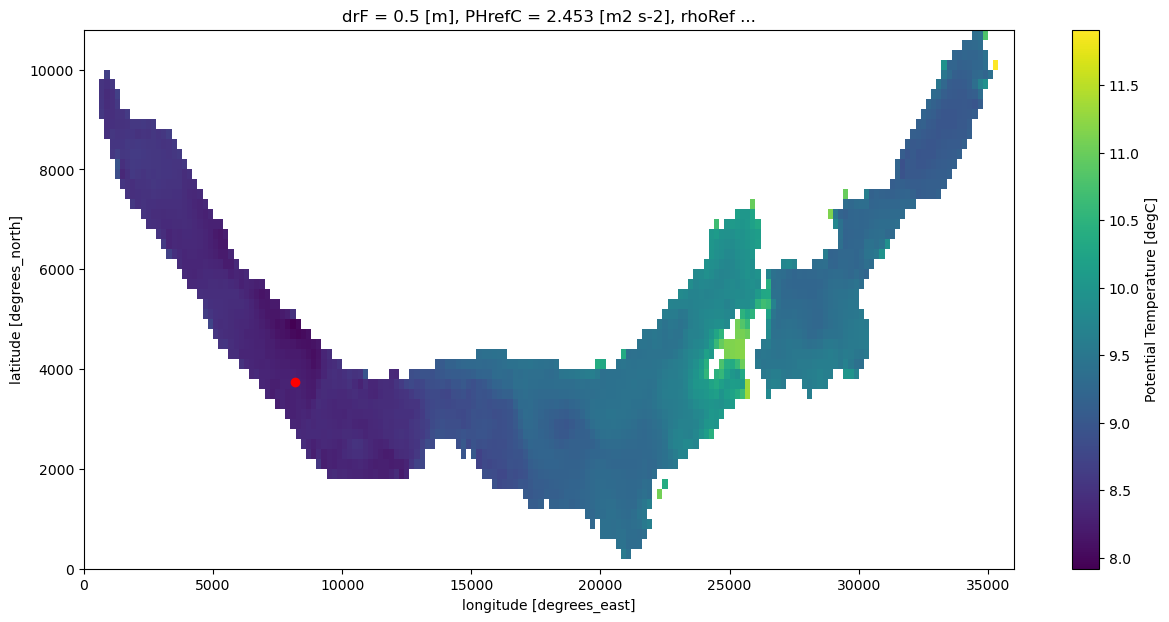

In [61]:
xc_mitgcm_station = 8178
yc_mitgcm_station = 3739

date_plot_profil = datetime(2024,3,6,0,0,0)
date_plot_profil_str = date_plot_profil.strftime('%Y%m%d%H%M')

#chose between ['UVEL', 'VVEL', 'WVEL', 'THETA', 'rA', ..., 'XG', 'YG', 'Zp1', 'Zu', 'Zl']
plt.close('all')
plt.figure(figsize=(15,7))
ds_sel = ds_to_plot['THETA'].isel(Z=0, time=-10)
ds_sel.where(ds_sel != 0, np.nan).plot()
plt.scatter(xc_mitgcm_station,yc_mitgcm_station,color='red')
plt.show()

In [62]:
var='v10'
bin_file_path = rf"/storage/alplakes_test/Soren/lake_zh/march_24/binary_data/{var}.bin"
with open(bin_file_path, 'rb') as fid:
    binary_data = np.fromfile(fid, dtype='>f8')
grid_resolution = 200
grid_fact = grid_resolution / 50
nx =180
ny = 60
nt = len(binary_data) / nx /ny

from datetime import datetime, timedelta

start_date = datetime(2024, 3, 1)

date_list = []
for i in range(0, int(nt)):
    current_date = start_date + timedelta(hours=i)
    date_list.append(current_date)

bin_array = np.reshape(binary_data, (int(nt),int(ny),int(nx)))
i_time = -1


In [67]:
ds_to_plot['VVEL']

<xarray.DataArray 'VVEL' (time: 840, Z: 74, YG: 54, XC: 180)> Size: 5GB
dask.array<getitem, shape=(840, 74, 54, 180), dtype=float64, chunksize=(1, 74, 54, 180), chunktype=numpy.ndarray>
Coordinates: (12/13)
    dxG      (YG, XC) >f4 39kB dask.array<chunksize=(54, 180), meta=np.ndarray>
    dyC      (YG, XC) >f4 39kB dask.array<chunksize=(54, 180), meta=np.ndarray>
    rAs      (YG, XC) >f4 39kB dask.array<chunksize=(54, 180), meta=np.ndarray>
    drF      (Z) >f4 296B dask.array<chunksize=(74,), meta=np.ndarray>
    PHrefC   (Z) >f4 296B dask.array<chunksize=(74,), meta=np.ndarray>
    hFacS    (Z, YG, XC) >f4 3MB dask.array<chunksize=(74, 54, 180), meta=np.ndarray>
    ...       ...
    rhoRef   (Z) >f4 296B dask.array<chunksize=(74,), meta=np.ndarray>
    iter     (time) int64 7kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) datetime64[ns] 7kB 2024-03-01T00:59:44 ... 2024-04-05
  * Z        (Z) float64 592B -0.25 -0.7575 -1.281 ... -125.6 -130.0 -134.1
  * XC       (XC) float64 1kB 100.0 300.0 500.0 ... 3.55e+04 3.57e+04 3.59e+04
  * YG       (YG) float64 432B 0.0 200.0 400.0 ... 1.02e+04 1.04e+04 1.06e+04
Attributes:
    standard_name:  VVEL
    long_name:      Meridional Component of Velocity (m/s)
    units:          m/s
    mate:           UVEL

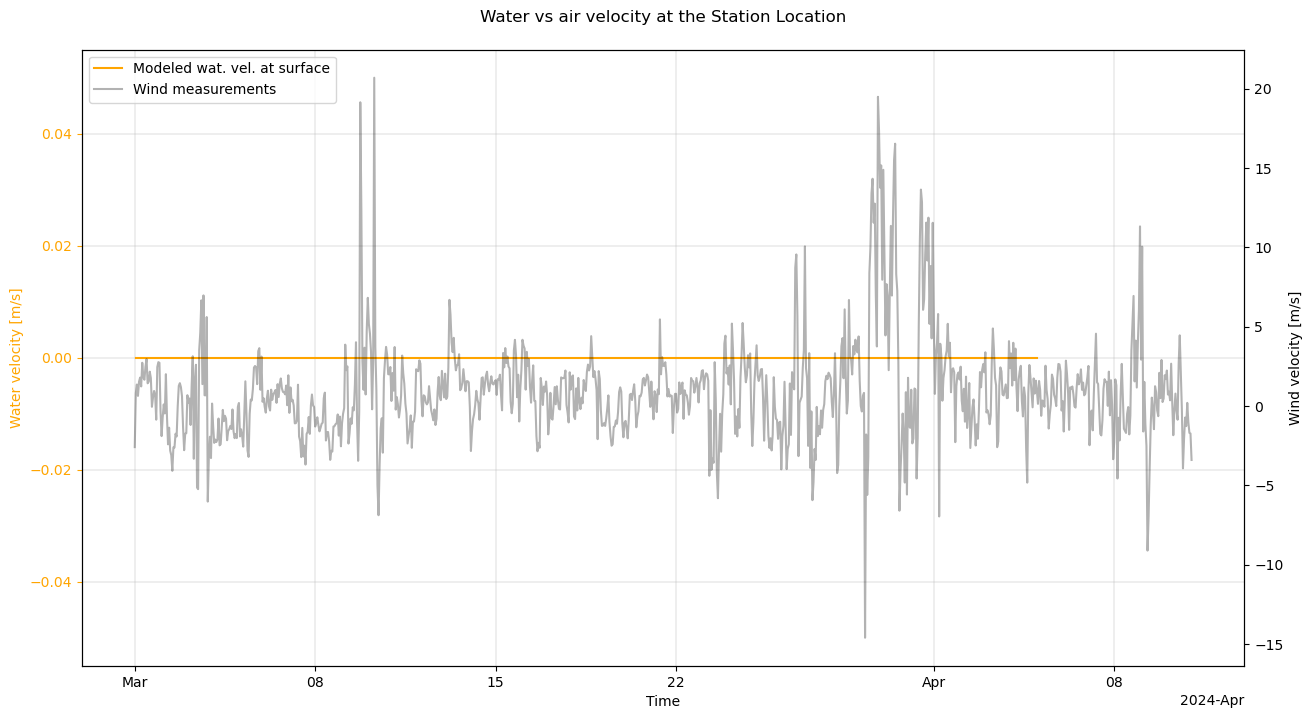

In [69]:
# FIGURE AIR VS WATER VELOCITY

plt.close('all')
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot water velocity on primary y-axis

ds_to_plot['VVEL'].sel(XC=xc_mitgcm_station, YG=yc_mitgcm_station, Z=-i*5, method='nearest').plot(
ax=ax1, color = "orange",label="Modeled wat. vel. at surface")

ax1.set_ylabel('Water velocity [m/s]', color='orange')
ax1.set_title("")
#ax1.set_ylim(-0.3, 0.3)
ax1.tick_params(axis='y', colors='orange')
ax1.grid(True, which='both', linewidth=0.3)

# Create secondary y-axis for wind speed
ax2 = ax1.twinx()
ax2.plot(date_list, bin_array[:, 19, 41], linestyle='-', color='black',alpha=0.3, label='Wind measurements')

ax2.set_ylabel('Wind velocity [m/s]', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Water vs air velocity at the Station Location',pad=20)
#plt.savefig(rf"{lake_name}_Vel_air_vs_wat_march.png")
plt.show()

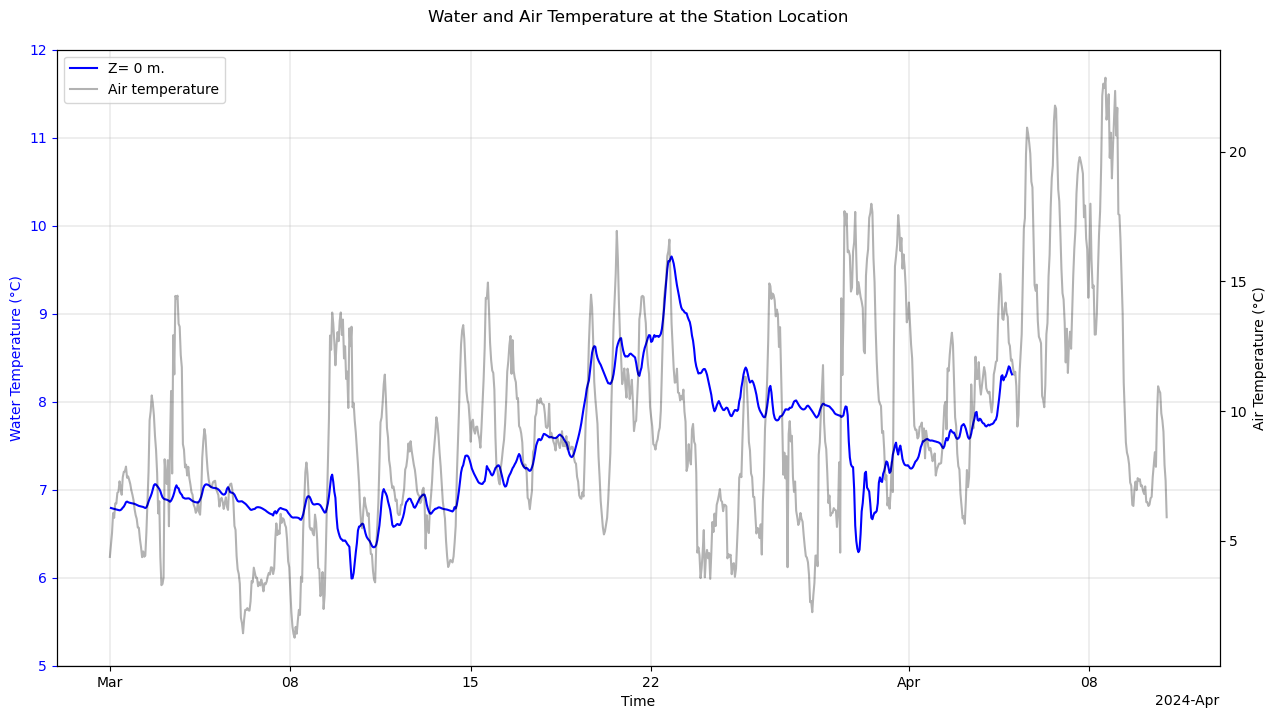

In [40]:
# FIGURE AIR VS WATER TEMP

plt.close('all')
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot water temperature on primary y-axis
for i in range(1):
    ds_to_plot['THETA'].sel(XC=xc_mitgcm_station, YC=yc_mitgcm_station, Z=-i*5, method='nearest').plot(
        ax=ax1, color = "blue",label=f"Z= {i*5} m.")

ax1.set_ylabel('Water Temperature (°C)')
ax1.set_title("")
ax1.set_ylim(5, 12)
ax1.set_ylabel('Water Temperature (°C)', color='blue')
ax1.tick_params(axis='y', colors='blue')
ax1.grid(True, which='both', linewidth=0.3)

# Create secondary y-axis for air temperature
ax2 = ax1.twinx()
ax2.plot(date_list, bin_array[:, 19, 41]-273.15, linestyle='-', color='black',alpha=0.3, label='Air temperature')

ax2.set_ylabel('Air Temperature (°C)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Water and Air Temperature at the Station Location',pad=20)
plt.savefig(rf"{lake_name}_Temp_air_vs_wat_march.png")
plt.show()

In [24]:
def plot_map(i_time: int, i_depth: int):
    plt.ioff()
    plt.close()
    fig, ax = plt.subplots(figsize=(17,6))
    
    T_plot = ds_to_plot['time'].values[i_time]
    Z_plot = ds_to_plot['Z'].values[i_depth]
    xr_plot = ds_to_plot['THETA'].sel(time=T_plot, Z=Z_plot)
    xr_plot = xr_plot.where(xr_plot != 0, np.nan)
    xr_plot.plot(cmap='jet', vmin=5, vmax=7)
    plt.axis('equal')
    
    subsetting_factor = 3
    X_trimmed = ds_to_plot['XC'][::subsetting_factor]
    Y_trimmed = ds_to_plot['YC'][::subsetting_factor]
    U_trimmed = ds_to_plot['UVEL'].sel(time=T_plot, Z=Z_plot)[:,1:][::subsetting_factor,::subsetting_factor]
    V_trimmed = ds_to_plot['VVEL'].sel(time=T_plot, Z=Z_plot)[1:,:][::subsetting_factor,::subsetting_factor]
    
    U_trimmed = U_trimmed.where(U_trimmed != 0, np.nan)
    V_trimmed = V_trimmed.where(V_trimmed != 0, np.nan)
    plt.quiver(X_trimmed, Y_trimmed, U_trimmed, V_trimmed, scale=7)
    
    #plt.xlim(37500,42500)
    #plt.ylim(19500,24500)
    
    plt.text(0.02, 0.98, f'{np.datetime_as_string(T_plot, unit="s").replace("T", " ")}', transform=plt.gca().transAxes, ha='left', va='top')
    plt.text(0.02, 0.9, f'Z={Z_plot}m', transform=plt.gca().transAxes, ha='left', va='top')
    plt.title('')
    
    # Remove axis, ticks, labels, and title
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    return plt.gcf()

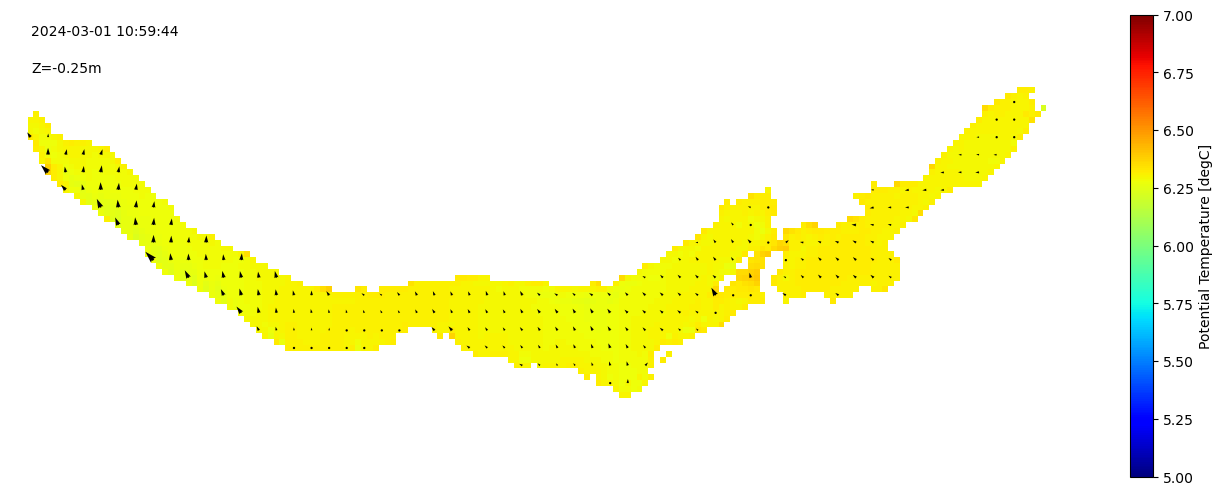

In [30]:
i_time = 10
i_depth = 0
plot_map(i_time, i_depth)

In [38]:
sta_name = 'lower_zurich'
with open(os.path.join('/home/rasmusso@eawag.wroot.emp-eaw.ch/Documents/plot_results/config_points.json'), 'r') as file:
    config_points = json.load(file)[sta_name]
    
xc_mitgcm_station = config_points['xc_mitgcm_200m']
yc_mitgcm_station = config_points['yc_mitgcm_200m']

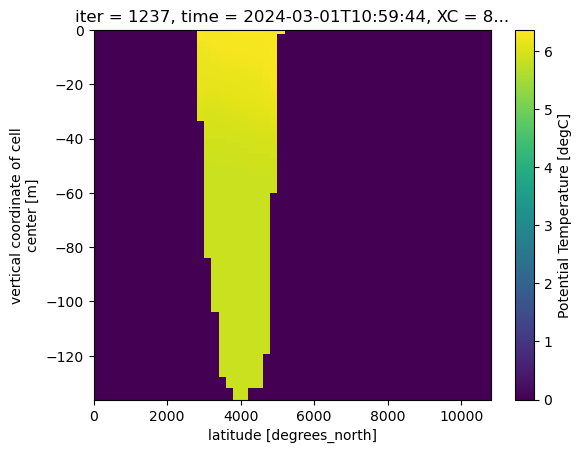

In [39]:
ds_to_plot['THETA'].isel(time=i_time).sel(XC=xc_mitgcm_station, method='nearest').plot()
plt.show()